In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [15]:
import numpy as np
from alcemuon import MuonHamiltonian
from alcemuon.pwdavg.ourleb import get_orient_set

In [58]:
# Magnetic field range and powder average orientations
Brange = np.linspace(400, 600, 200)
orients, weights = get_orient_set(100) # It will be minimum 100 orientations, or more

In [59]:
# Example tensor: 500 MHz is the Fermi contact term, everything else is 20 MHz
A = np.eye(3)*480 + np.ones((3,3))*20

mHam = MuonHamiltonian()
# The index refers to the nucleus: 0 is the electron, 1 is the muon, 2 etc. are other nuclei
mHam.add_hyperfine_coupling(A, 1)

In [60]:
spec = mHam.ALC(Brange, orients, weights)

<IPython.core.display.Javascript object>


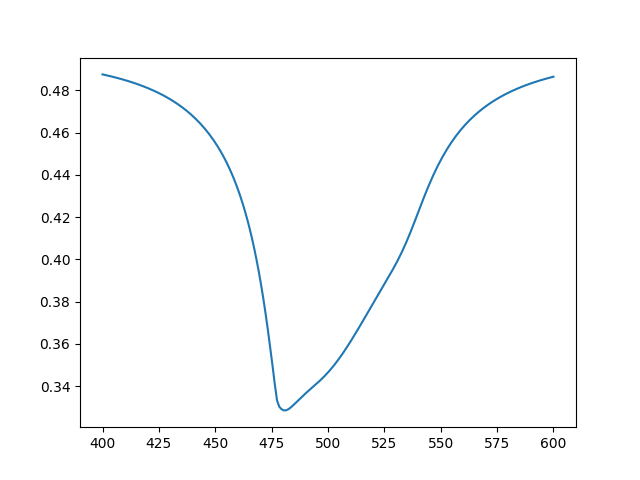

In [61]:
fig, ax = plt.subplots()

ax.plot(Brange, spec)

In [71]:
# Second example: add an 'ipso hydrogen' interaction
A = np.eye(3)*480 + np.ones((3,3))*20
AH = np.eye(3)*100+np.ones((3,3))*30

mHamH = MuonHamiltonian(other_spins=['H'])
mHamH.add_hyperfine_coupling(A, 1)
mHamH.add_hyperfine_coupling(AH, 2) # 2 here is the H nucleus

In [74]:
# split_e makes the calculation faster, but will not work near B = 0
specH = mHamH.ALC(Brange, orients, weights, split_e=True) 

<IPython.core.display.Javascript object>


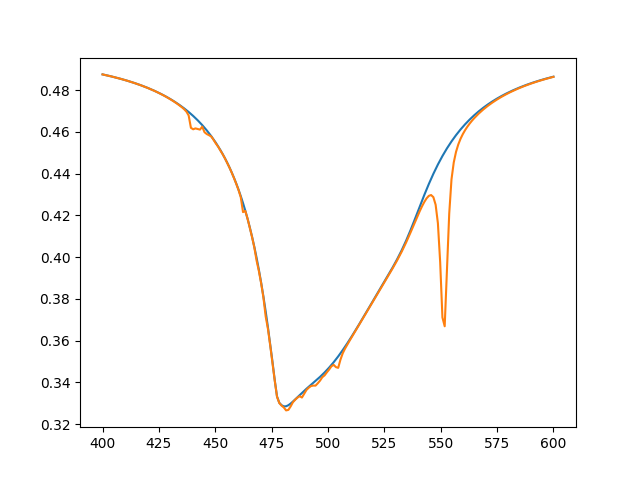

In [75]:
fig, ax = plt.subplots()

ax.plot(Brange, spec)
ax.plot(Brange, specH)